In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show

<function matplotlib.pyplot.show(*args, **kwargs) -> 'None'>

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp = pd.read_csv('./data/gdp_percapita.csv.csv')
gdp.head(3)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN


In [3]:
gdp.shape

(8219, 4)

How many rows and columns are in gdp_df? 4
What are the data types of each column? 'Country or Area', 'Year', 'Value', 'Value Footnotes'

In [4]:
gdp.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp=gdp.drop(columns = ['Value Footnotes'])
gdp.columns= ['Country', 'Year','GDP_Per_Capita']

In [7]:
gdp.head(3)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570


How many countries have data for all years? 2023-1990

Which countries are missing many years of data? 

Look at the number of observations per year. What do you notice? Stabilizes by 2014

In [8]:
gdp_counts = gdp.Country.value_counts().to_frame().reset_index()

In [9]:
gdp_counts

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [10]:
## gdp_counts.loc[gdp_counts['count']== 34]

In [11]:
gdp.Country.value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [12]:
twenty_gdp =gdp.loc[gdp.Year == 2020]

What was the median GDP per capita value in 2020? 15309.235988


In [13]:
twenty_gdp.describe()

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

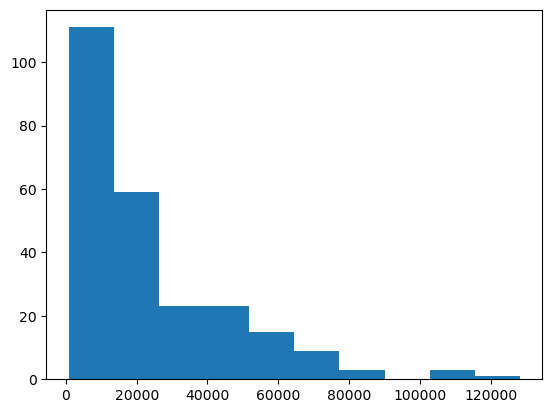

In [14]:
twenty_gdp.hist('GDP_Per_Capita', bin = 25);

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

A scatterplot

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [16]:
gdp_decades = [1990, 2000,2010, 2020]
gdp_decades = gdp.loc[gdp.Year.isin(gdp_decades)]

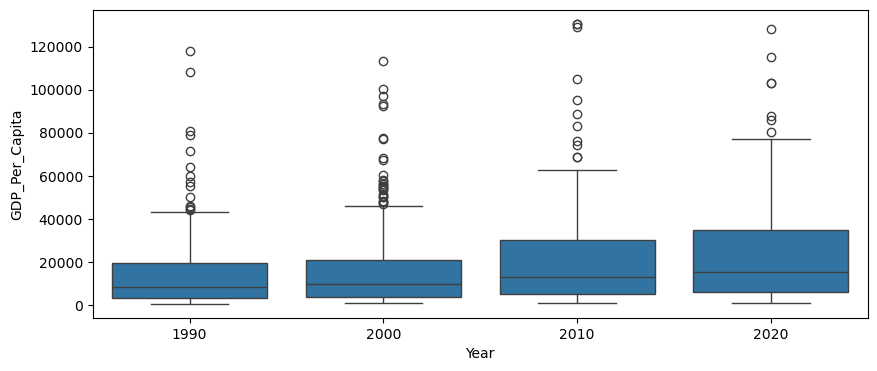

In [18]:
plt.figure(figsize = (10,4))
sns.boxplot(data = gdp_decades, x = 'Year', y= 'GDP_Per_Capita')
plt.show()
## not useful for this info

<function matplotlib.pyplot.show(close=None, block=None)>

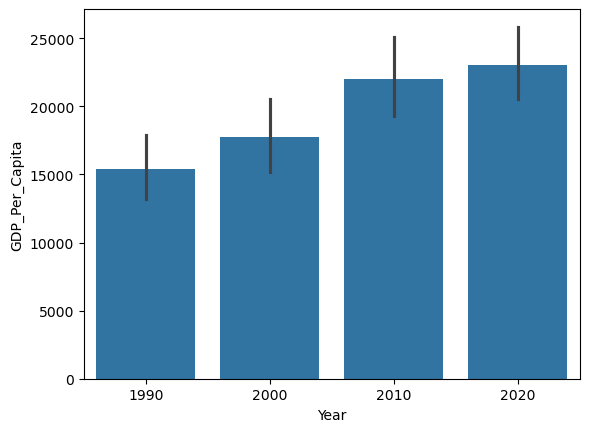

In [19]:
sns.barplot( x = 'Year', y= 'GDP_Per_Capita', data=gdp_decades);
plt.show
## useless for this info

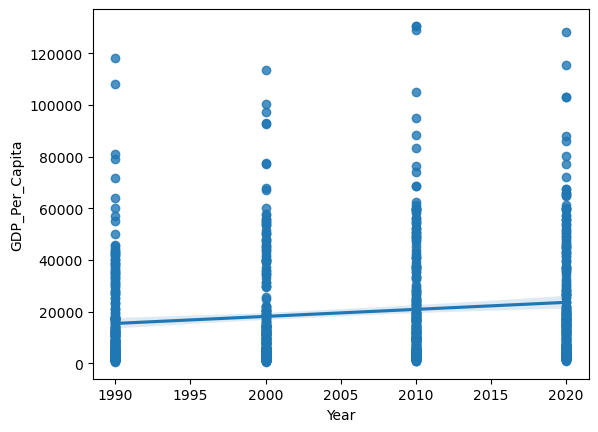

In [20]:
sns.regplot(x = 'Year', y= 'GDP_Per_Capita', data=gdp_decades);


## feels like I programmed this one wrong? feels the most useful though

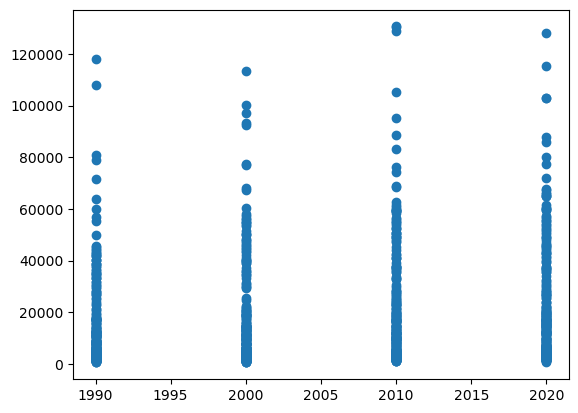

In [21]:
plt.scatter( x = 'Year', y= 'GDP_Per_Capita', data=gdp_decades)

Which country was the first to have a GDP per capita greater than $100,000?

Brunei

In [22]:
gdp.sort_values(by = 'Year', ascending = True)

only_important = gdp[gdp['GDP_Per_Capita']> 100000]

only_important.sort_values(by = 'Year', ascending = True)

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

128256.5603407562 - Luxembourg

In [24]:
truedf = twenty_gdp.sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)

truedf.head(5)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


<Axes: xlabel='Year'>

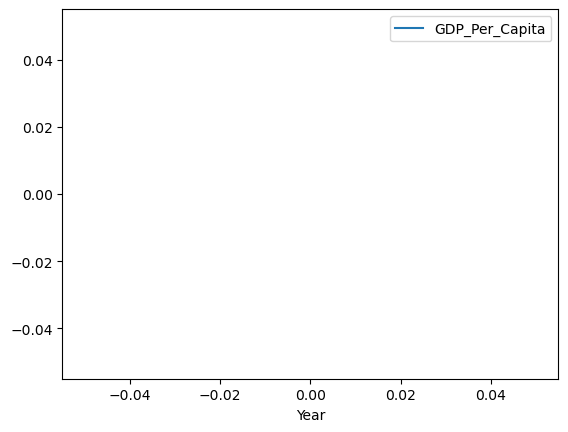

In [25]:
gdp.loc[gdp.Country.isin(truedf)].plot(x= 'Year', y= 'GDP_Per_Capita')

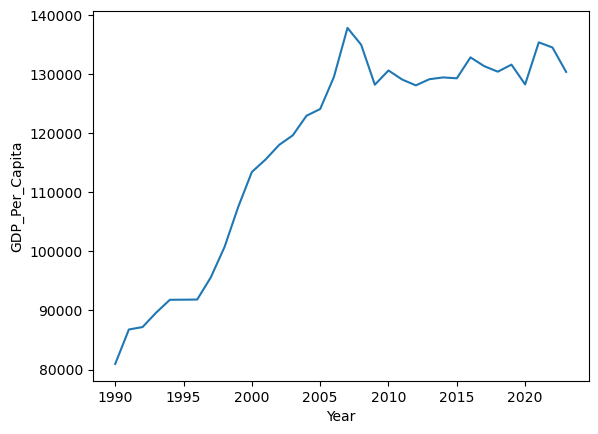

In [26]:
Luxem=  ['Luxembourg']

luxemdf= gdp.loc[gdp.Country.isin(Luxem)]

sns.lineplot(data=luxemdf, x="Year", y="GDP_Per_Capita")
plt.show()

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Burundi

In [28]:
truedf = twenty_gdp.sort_values(by = 'GDP_Per_Capita', ascending = False)

truedf.tail(5)

,Country,Year,GDP_Per_Capita
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530
1046,Burundi,2020,833.920257


Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [32]:
internet_df = pd.read_csv('./data/internet_use.csv.csv', nrows = 6083)
# gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [33]:
internets=internet_df.drop(columns = ['Value Footnotes'])
internets.columns= ['Country', 'Year','Internet_Users_Pct']
internets.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


Look at the number of observations in this dataset per year. What do you notice?

In [21]:
first_year_df=internet_df[internet_df['Internet_Users_Pct']> 0]
first_year_df.sort_values(by = 'Year', ascending = True)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


How does the distribution of internet users percent differ for 2000 and 2014?

In [38]:
internet_00_14 = internets.loc[internets.Year.isin([2000, 2014])]

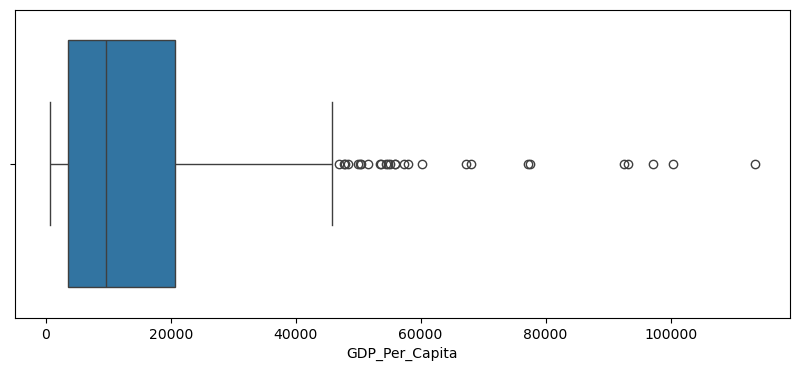

In [22]:
y2k = [2000]
y2k_df= gdp_df.loc[gdp_df.Year.isin(y2k)]
plt.figure(figsize = (10,4))
sns.boxplot(data = y2k_df, x = 'GDP_Per_Capita')
plt.show()

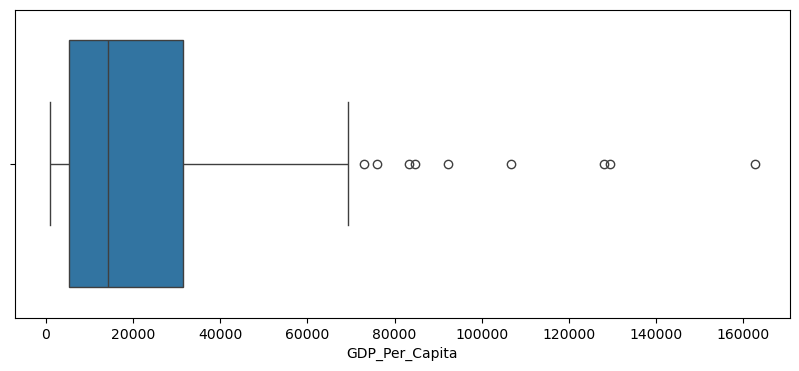

In [23]:
y14k = [2014]
y14k_df= gdp_df.loc[gdp_df.Year.isin(y14k)]
plt.figure(figsize = (10,4))
sns.boxplot(data = y14k_df, x = 'GDP_Per_Capita')
plt.show()

For how many countries was the percentage of internet users below 5% in 2014?

In [24]:
second_year_df=internet_df[internet_df['Internet_Users_Pct']> 5]
fourteen_year = [2014]
second_year_df=second_year_df.loc[second_year_df.Year.isin(fourteen_year)]
second_year_df.head()

,Country,Year,Internet_Users_Pct


Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [39]:
gdp_and_internet_use = pd.merge(gdp, internets, how ='outer', on = ['Country', 'Year'])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
top3 = 

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them

Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

Stretch Question: How does the median internet users percentage compare for the three gdp groups?